<a href="https://colab.research.google.com/github/IgorColetoBueno/data-science-starter/blob/main/class%20-%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')

data['finished'] = data.unfinished.map({0:1,1:0})
del data['unfinished']

print(data)

      expected_hours  price  finished
0                 26    192         0
1                 88   9015         0
2                 89   2577         0
3                 42    275         0
4                 39    170         0
...              ...    ...       ...
2152              80   7518         1
2153              52   1332         0
2154              40    473         1
2155              75   5324         1
2156              37    377         0

[2157 rows x 3 columns]


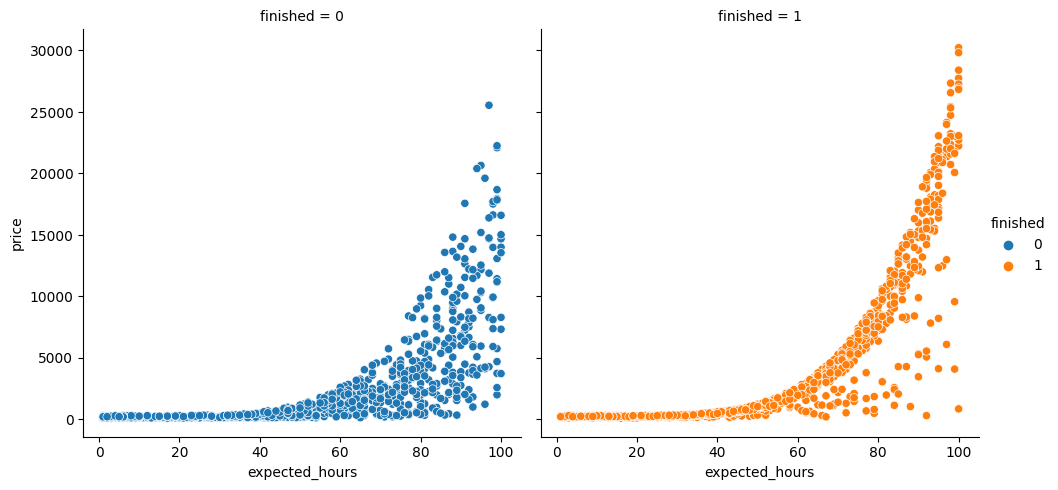

In [3]:
import seaborn as sns

sns.relplot(x="expected_hours", y="price", hue="finished", col="finished", data=data)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x=data[['expected_hours', 'price']]
y=data['finished']
train_x,test_x,train_y, test_y = train_test_split(x, y, random_state=20,test_size=0.30,stratify=y )

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)
score = accuracy_score(test_y, predictions)

print(score)

0.5046296296296297


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Axes: xlabel='expected_hours', ylabel='price'>

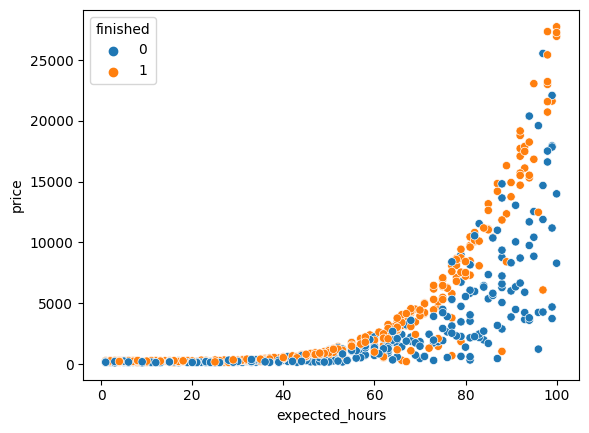

In [5]:
sns.scatterplot(x="expected_hours", y="price", hue=test_y, data=test_x)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


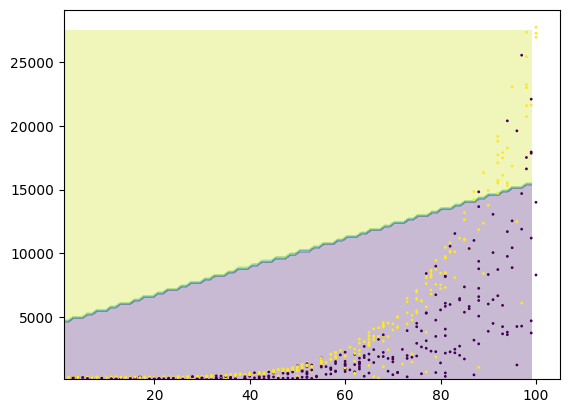

In [6]:
x_min = test_x['expected_hours'].min()
x_max = test_x['expected_hours'].max()
y_min = test_x['price'].min()
y_max = test_x['price'].max()

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max-x_min)/pixels)
y_axis = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(points)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

np.random.seed(20)

svc_model = SVC(gamma='auto')

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x,y, test_size=0.30, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_train_x)

train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

svc_model.fit(train_x, train_y)

predictions = svc_model.predict(test_x)

score = accuracy_score(test_y, predictions) * 100
print(score)


69.1358024691358
